<a href="https://colab.research.google.com/github/qweliant/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

In [0]:
# i changed

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

!pip install pandas==0.23.4



In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/qweliant/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
'''
things we can predict from this dataset include age, weight, and excercise time(min)

Predictions and Confounding Variables

exercise time(ET): Predicting the ET based on weight and age may be useful. Say, we have
dietary supplement, we want to know if using it cuts time across age level so we know who to target 
the product to? To set up the experiment, we would want to know how multiple 
people perform across differnet age groups.

Confounding Variable:
1) Can we assume that the age of people will skew ET that we infer?
2) What about the weight of users? Will that skew ET as well


'''
time_bins = pd.cut(df['age'], 5)
crosstab = pd.crosstab( time_bins, df['exercise_time'],  normalize='columns')


In [0]:
crosstab

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(17.938, 30.4]",0.5,0.00,0.000000,0.333333,0.0,0.000000,0.333333,1.0,0.0,0.666667,0.166667,1.0,0.0,0.000000,0.000000,0.2,0.2,0.000000,0.000000,0.0,0.2,0.083333,0.285714,0.0,0.2,0.000000,0.0,0.000000,0.500000,0.142857,0.25,0.000000,0.166667,0.166667,0.285714,0.142857,0.2,0.4,0.0,0.50,...,0.333333,0.00,0.50,0.25,0.50,0.2,0.333333,0.25,0.0,0.0,0.000000,1.0,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.500000,0.5,0.50,0.0,0.000000,0.5,0.0,0.2,0.000000,0.142857,0.0,0.000000,0.0,0.333333,1.0,0.25,0.0,0.000000,0.0,0.2
"(30.4, 42.8]",0.5,0.25,0.142857,0.000000,0.4,0.142857,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.5,0.333333,0.000000,0.2,0.0,0.272727,0.500000,0.2,0.2,0.083333,0.000000,0.0,0.2,0.000000,0.0,0.333333,0.000000,0.142857,0.00,0.000000,0.333333,0.166667,0.285714,0.571429,0.4,0.2,0.0,0.25,...,0.333333,0.25,0.25,0.50,0.00,0.6,0.000000,0.00,0.0,1.0,0.500000,0.0,0.0,0.333333,0.000000,0.0,0.2,0.333333,0.000000,0.000000,0.000000,0.5,0.25,1.0,0.333333,0.0,0.0,0.2,0.333333,0.714286,0.0,0.666667,1.0,0.666667,0.0,0.75,0.5,0.166667,0.5,0.0
"(42.8, 55.2]",0.0,0.25,0.142857,0.333333,0.0,0.428571,0.166667,0.0,0.0,0.000000,0.333333,0.0,0.0,0.500000,0.000000,0.0,0.2,0.090909,0.000000,0.0,0.0,0.166667,0.142857,0.0,0.2,0.333333,0.0,0.000000,0.166667,0.000000,0.00,0.333333,0.166667,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.00,...,0.333333,0.50,0.25,0.25,0.25,0.0,0.666667,0.75,1.0,0.0,0.166667,0.0,1.0,0.333333,0.666667,1.0,0.6,0.500000,0.666667,0.333333,0.333333,0.0,0.25,0.0,0.333333,0.5,1.0,0.4,0.333333,0.142857,1.0,0.333333,0.0,0.000000,0.0,0.00,0.5,0.333333,0.5,0.6
"(55.2, 67.6]",0.0,0.50,0.142857,0.333333,0.2,0.142857,0.166667,0.0,0.0,0.000000,0.500000,0.0,0.0,0.166667,0.666667,0.0,0.0,0.363636,0.166667,0.2,0.0,0.166667,0.142857,0.5,0.2,0.333333,0.5,0.333333,0.000000,0.285714,0.50,0.333333,0.333333,0.166667,0.142857,0.000000,0.0,0.0,1.0,0.25,...,0.000000,0.25,0.00,0.00,0.25,0.2,0.000000,0.00,0.0,0.0,0.333333,0.0,0.0,0.000000,0.333333,0.0,0.2,0.166667,0.333333,0.000000,0.166667,0.0,0.00,0.0,0.333333,0.0,0.0,0.2,0.333333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.500000,0.0,0.2
"(67.6, 80.0]",0.0,0.00,0.571429,0.000000,0.4,0.285714,0.333333,0.0,1.0,0.000000,0.000000,0.0,0.5,0.000000,0.333333,0.6,0.6,0.272727,0.333333,0.6,0.6,0.500000,0.428571,0.5,0.2,0.333333,0.5,0.333333,0.333333,0.428571,0.25,0.333333,0.000000,0.500000,0.285714,0.142857,0.4,0.4,0.0,0.00,...,0.000000,0.00,0.00,0.00,0.00,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0


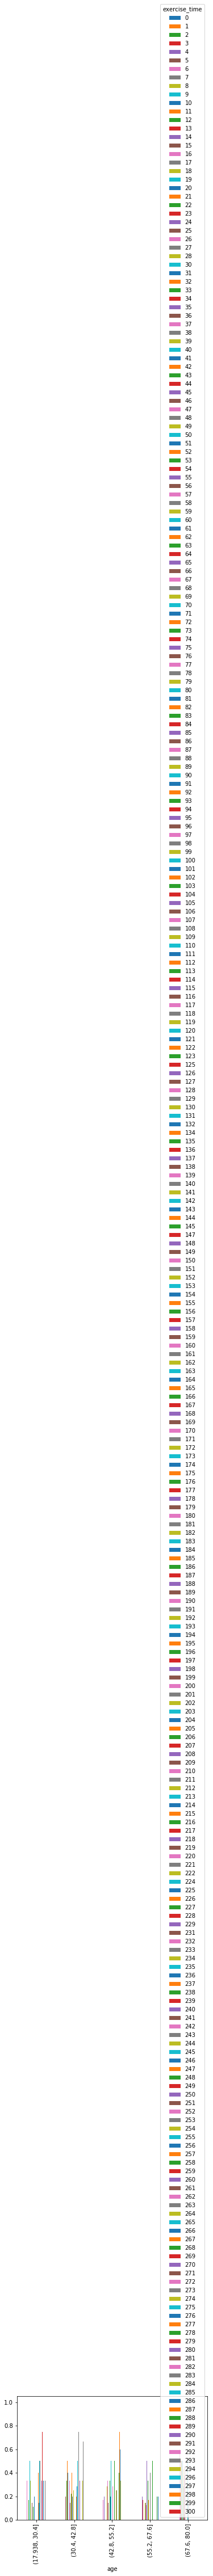

In [0]:
crosstab.plot(kind='bar')
#but this doesn't do much for us

In [24]:
# !pip install bokeh
# !pip install selenium
!conda install phantomjs

/bin/bash: conda: command not found


In [0]:
from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.unemployment1948 import data
from bokeh.transform import transform
import numpy as np

In [25]:
source = ColumnDataSource(df)

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.exercise_time.min(), high=df.exercise_time.max())

output_notebook()

p = figure(plot_width=800, plot_height=300, title="Excersise Time Across Age",
           toolbar_location=None, tools="", x_axis_location="above")

p.rect(x="age", y="weight", width=1, height=1, source=source,
       line_color=None, fill_color=transform('exercise_time', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"))

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

show(p)


In [0]:

df.dtypes


In [0]:
'''
1. Integers
2. Excercise time(y), depends on age(x)
3. Weight loss does not correlate with age
   real data would show that the younger and lighter you are, the more you will excercise
   
'''

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)